## PROJECT 2 - GOLD PRICE PREDICTION
 TEAM MEMBERS: MANGALA MADHAN KUMAR, SUJEETH KUMAR G K, ULLAS RAJU C R, AKASH G

### Importing Relevant Packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

### Importing the dataset

In [3]:
dataset = pd.read_csv('gld_price_data.csv')

In [4]:
dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
print(dataset.shape)

(2290, 6)


### Exploratory Data Analysis

In [6]:
dataset.info()
# all the columns are float type only date is categorical type 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
dataset.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [8]:
print(dataset.isnull().sum())
#as we can see there are no null values in our dataset

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64


In [9]:
duplicate_rows = dataset[dataset.duplicated()]
print("Number of duplicate rows: ", duplicate_rows.shape)
#as we can see there are no duplicate rows

Number of duplicate rows:  (0, 6)


### Heatmap

<AxesSubplot:>

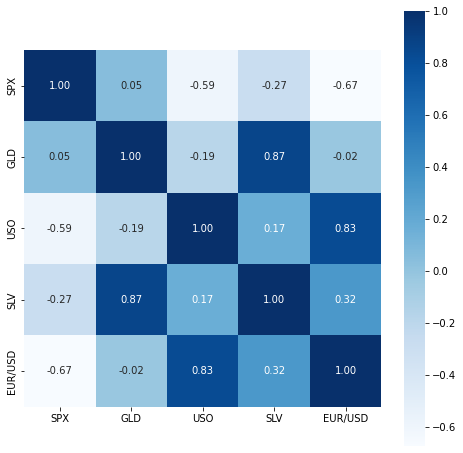

In [10]:
plt.subplots(figsize=(8,8))
sns.heatmap(dataset.corr(), cbar=True, square=True, fmt='.2f', annot=True, annot_kws = {'size':10}, cmap='Blues')

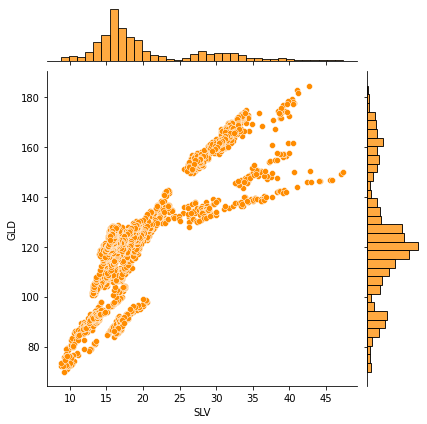

In [11]:
sns.jointplot(x =dataset['SLV'], y = dataset['GLD'], color = 'darkorange')
# Now we check the relation of SLV with GLD variable
# as we can see that the conclusion we made using the heatmap is true.

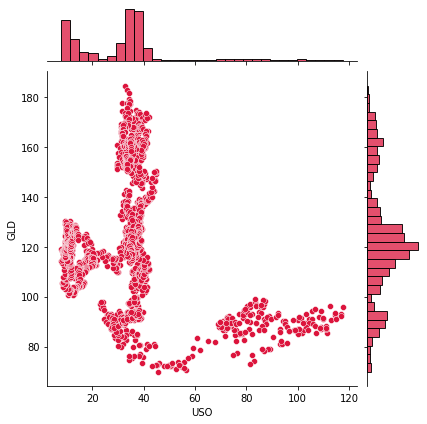

In [12]:
sns.jointplot(x =dataset['USO'], y = dataset['GLD'], color = 'crimson')
#Now we check the relation of USO with GLD variable

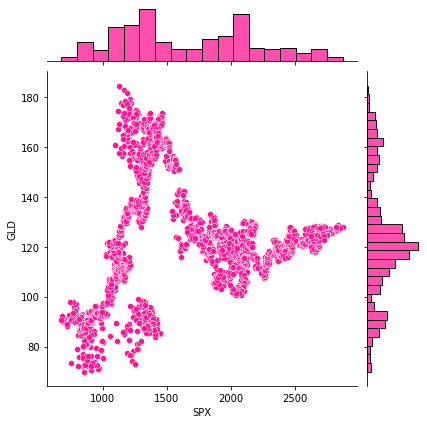

In [13]:
sns.jointplot(x =dataset['SPX'], y = dataset['GLD'], color = 'deeppink')
#Now we check the relation of SPX with GLD variable

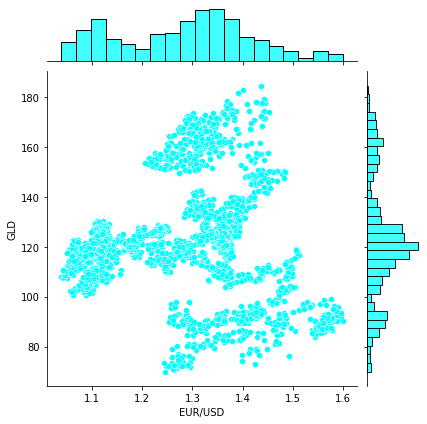

In [14]:
sns.jointplot(x =dataset['EUR/USD'], y = dataset['GLD'], color = 'cyan')
#Now we check the relation of EUR?USD with GLD variable

d:\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

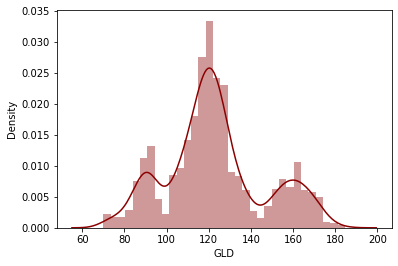

In [15]:
sns.distplot(dataset['GLD'], color = 'darkred')
# Lets Check our target variable

### Extracting the Dependent and Independent Variables

In [16]:
x = dataset.drop(['Date', 'GLD'], axis=1)
y = dataset['GLD']

### Splitting the dataset into training and test data

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape)

(1832, 4) (458, 4)


### Creating a function to apply different regression models

In [18]:
def fit_predict(model1):
    model = model1
    model.fit(x_train, y_train)
    y_predict = model.predict(x_test)
    print('RSS: ', metrics.r2_score(y_test, y_predict))
    print('MAE :', metrics.mean_absolute_error(y_test, y_predict))
    plt.scatter(y_test, y_predict)
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title('Actual Price vs Predicted Price of Gold')
    plt.show()
    plt.scatter(y_test, y_predict, c='magenta')
    p1 = max(max(y_predict), max(y_train))
    p2 = min(min(y_predict), min(y_train))
    plt.plot([p1,p2], [p1,p2], 'r-')
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title('Actual Price vs Predicted Price')
    plt.show()

### Linear Regression

RSS:  0.8975640982991402
MAE : 5.6959006442692885


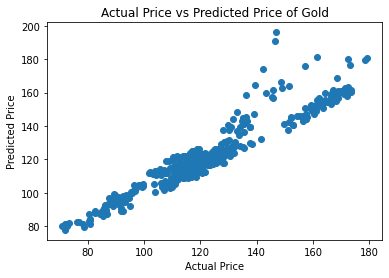

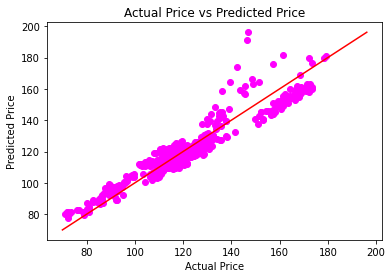

In [19]:
from sklearn.linear_model import LinearRegression
fit_predict(LinearRegression())

### Random Forest Regression

RSS:  0.9892674649325068
MAE : 1.2477577634279473


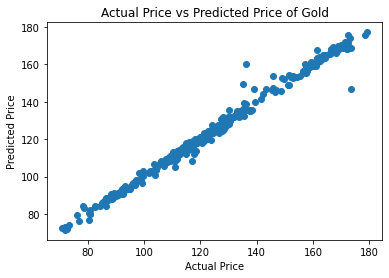

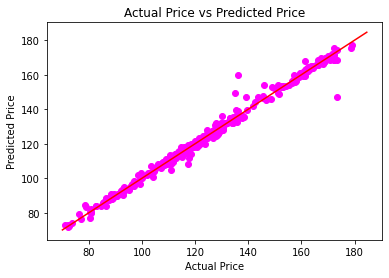

In [20]:
from sklearn.ensemble import RandomForestRegressor
fit_predict(RandomForestRegressor(n_estimators = 100, random_state = 0))

### XGBoost Regression

RSS:  0.9890564949875807
MAE : 1.4657916973860963


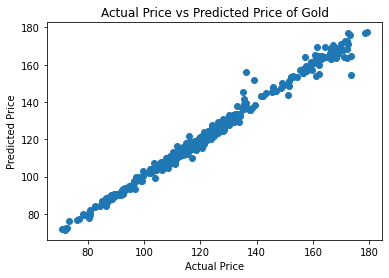

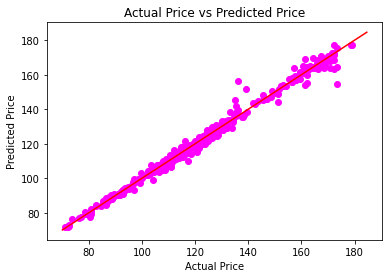

In [21]:
from xgboost import XGBRegressor
fit_predict(XGBRegressor())

### Creating a test case

In [22]:
model = XGBRegressor()                                    # using XGB to make predictions for our test case
model.fit(x_train, y_train)

test_case_list = [1254.25, 70.2527, 18.280001, 0.9232]    #creating a list of random price of independent variables
test_case_df = pd.DataFrame(test_case_list)               # converting the list into a dataframe
test_case = test_case_df.T                                # the shape of current df is (4,1) and the required shape is (1,4)
test_case_prediction = model.predict(test_case)           # predicting the price of GOLD for test case
print('Price of Gold would be:', test_case_prediction)    #printing the result

Price of Gold would be: [101.94066]
